# MakeMore
makemore takes one text file as input, where each line is assumed to be one training thing, and generates more things like it. Under the hood, it is an autoregressive character-level language model, with a wide choice of models from bigrams all the way to a Transformer (exactly as seen in GPT). For example, we can feed it a database of names, and makemore will generate cool baby name ideas that all sound name-like, but are not already existing names. Or if we feed it a database of company names then we can generate new ideas for a name of a company. Or we can just feed it valid scrabble words and generate english-like babble.

In [45]:
words = open('names.txt', 'r').read().splitlines()

In [47]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [49]:
len(words)

32033

In [51]:
words2 = open('IN.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [53]:
words = words + words2
len(words)

38519

In [55]:
min(len(w) for w in words)

2

In [57]:
max(len(w) for w in words)

19

In [59]:
[w for w in words if len(w) == 19]

['lllllllllllllllllll']

In [61]:
words.remove('lllllllllllllllllll')

In [63]:
max(len(w) for w in words)

15

In [65]:
[w for w in words if len(w) == 15]

['muhammadibrahim', 'muhammadmustafa', 'warnakulasuriya']

### Bigram Model

In [69]:
words[:3]

['emma', 'olivia', 'ava']

In [83]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [91]:
sorted(b.items(), key=lambda kv: kv[1], reverse=True)

[(('a', '<E>'), 8193),
 (('n', '<E>'), 7390),
 (('a', 'n'), 6841),
 (('<S>', 'a'), 4998),
 (('a', 'r'), 4197),
 (('e', '<E>'), 4077),
 (('n', 'a'), 3691),
 (('r', 'i'), 3429),
 (('h', 'a'), 3415),
 (('i', '<E>'), 3408),
 (('r', 'a'), 3371),
 (('<S>', 'k'), 3343),
 (('e', 'l'), 3318),
 (('<S>', 's'), 3280),
 (('m', 'a'), 3220),
 (('<S>', 'm'), 3088),
 (('a', 'l'), 3078),
 (('l', 'e'), 3008),
 (('l', 'a'), 3007),
 (('e', 'n'), 2993),
 (('h', '<E>'), 2817),
 (('<S>', 'j'), 2719),
 (('l', 'i'), 2649),
 (('i', 'n'), 2605),
 (('a', 'h'), 2555),
 (('s', 'h'), 2522),
 (('y', 'a'), 2515),
 (('i', 'a'), 2484),
 (('o', 'n'), 2477),
 (('a', 'm'), 2293),
 (('e', 'r'), 2264),
 (('a', 'y'), 2192),
 (('<S>', 'r'), 2190),
 (('k', 'a'), 2132),
 (('y', '<E>'), 2127),
 (('n', 'i'), 2050),
 (('<S>', 'd'), 1986),
 (('n', 'n'), 1971),
 (('r', '<E>'), 1951),
 (('r', 'e'), 1877),
 (('y', 'n'), 1834),
 (('a', 'i'), 1832),
 (('j', 'a'), 1817),
 (('s', 'a'), 1806),
 (('e', 'e'), 1774),
 (('l', '<E>'), 1707),
 (('

In [95]:
import torch

In [112]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [114]:
set(''.join(words))

{'&',
 '(',
 ')',
 ',',
 '/',
 '0',
 '8',
 '[',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [118]:
import re
words = [word for word in words if re.match("^[a-zA-Z]+$", word)]
len(words)

38499

In [132]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [134]:

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [139]:
import matplotlib.pyplot as plt 

In [143]:
itos = {i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

KeyError: 27

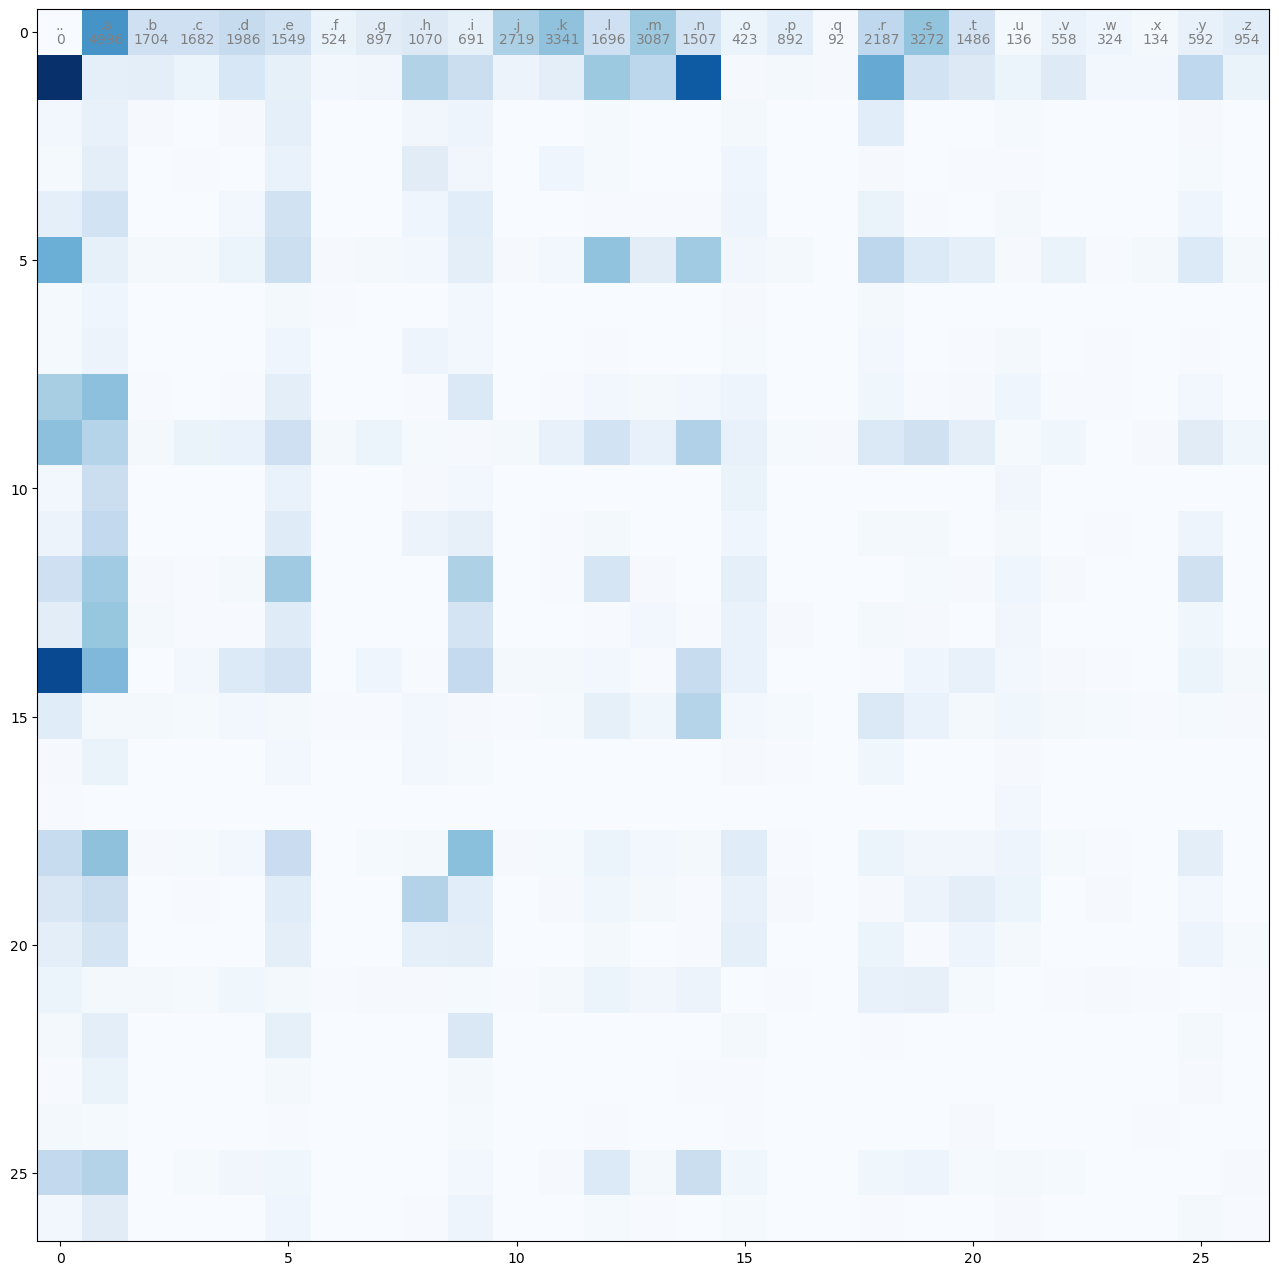

In [176]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='viridis')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

As we can see the last row and second last columns is all zero because `<s>` can never comes after any character similarly no word can start with `<E>` so we are wasting memory. let's fix this.

In [156]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [168]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [170]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

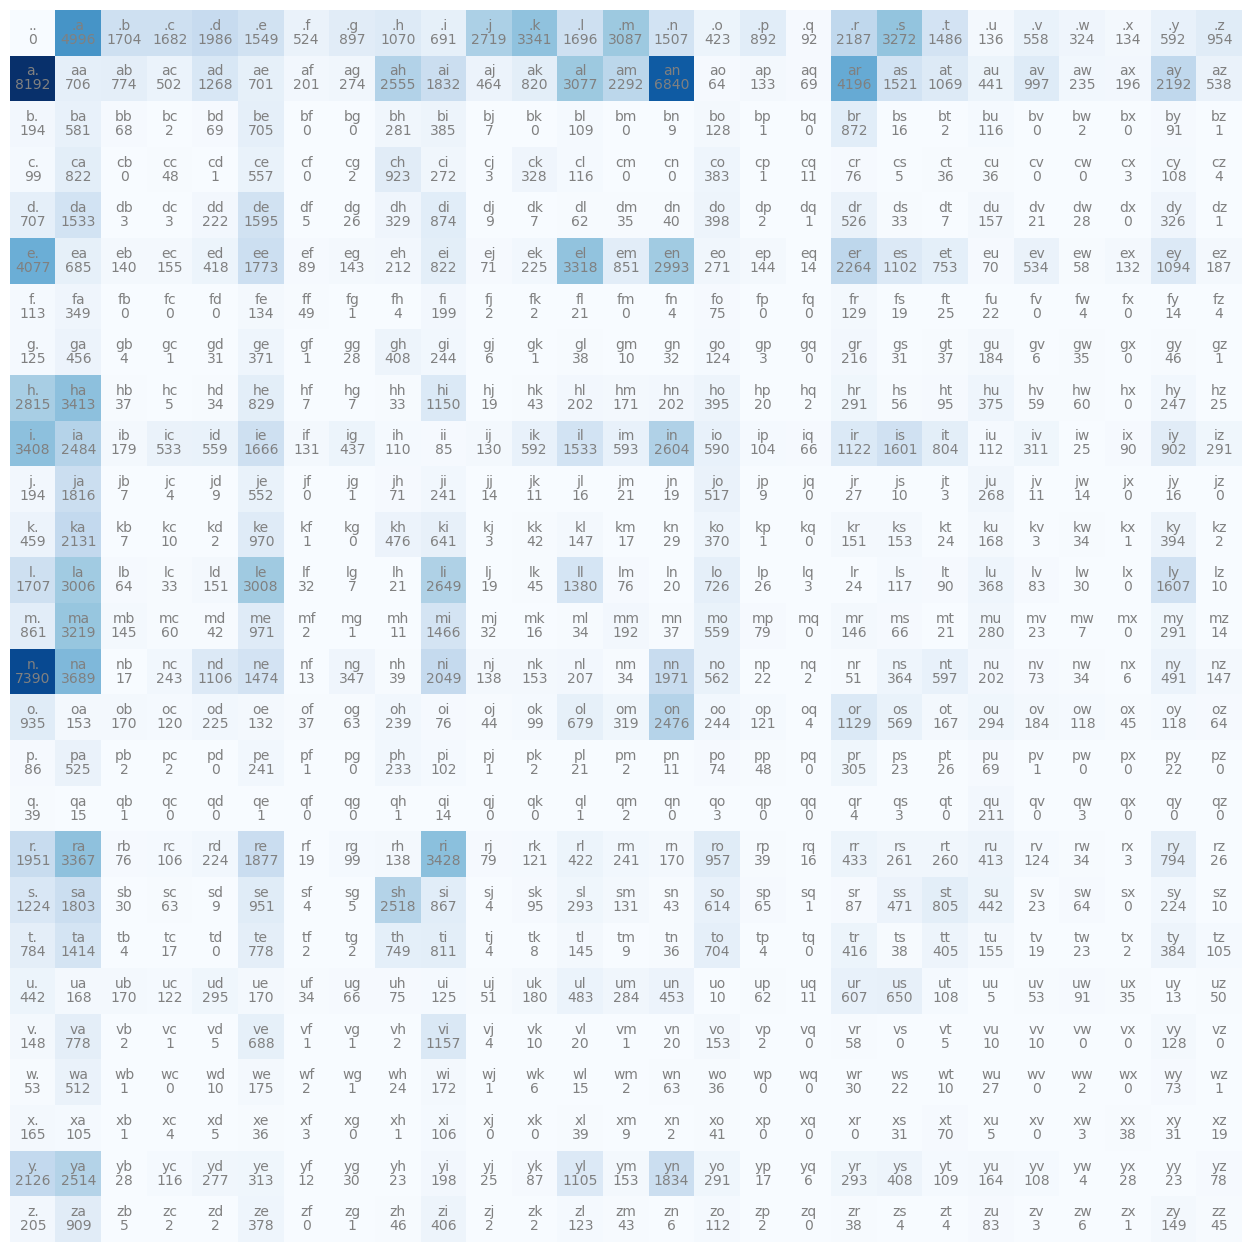

In [180]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [182]:
N[0, :]

tensor([   0, 4996, 1704, 1682, 1986, 1549,  524,  897, 1070,  691, 2719, 3341,
        1696, 3087, 1507,  423,  892,   92, 2187, 3272, 1486,  136,  558,  324,
         134,  592,  954], dtype=torch.int32)

### Probability Conversion

In [187]:
p = N[0, :].float()
p = p / p.sum()
p

tensor([0.0000, 0.1298, 0.0443, 0.0437, 0.0516, 0.0402, 0.0136, 0.0233, 0.0278,
        0.0179, 0.0706, 0.0868, 0.0441, 0.0802, 0.0391, 0.0110, 0.0232, 0.0024,
        0.0568, 0.0850, 0.0386, 0.0035, 0.0145, 0.0084, 0.0035, 0.0154, 0.0248])

**--------------------------------------------------------------------------------------**

**Demo of generator and multinomial object**

In [197]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

torch.multinomial ? -> it takes a tensor and draw the index number from the tensor randomly and it make sure that the index having high probability will get picked more often.

In [199]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

**--------------------------------------------------------------------------------------**

In [211]:
p = N[0, :].float()
p = p / p.sum()
p

tensor([0.0000, 0.1298, 0.0443, 0.0437, 0.0516, 0.0402, 0.0136, 0.0233, 0.0278,
        0.0179, 0.0706, 0.0868, 0.0441, 0.0802, 0.0391, 0.0110, 0.0232, 0.0024,
        0.0568, 0.0850, 0.0386, 0.0035, 0.0145, 0.0084, 0.0035, 0.0154, 0.0248])

In [223]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [239]:
P = N.float()
P /=  P.sum(dim=1, keepdim=True)

In [243]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cona.
a.


### Evaluate Quality of the model

In [251]:
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f'{ch1}{ch2}: {prob:.4f}')
        

.e: 0.0402
em: 0.0377
mm: 0.0224
ma: 0.3754
a.: 0.1944
.o: 0.0110
ol: 0.0769
li: 0.1731
iv: 0.0148
vi: 0.3611
ia: 0.1179
a.: 0.1944
.a: 0.1298
av: 0.0237
va: 0.2428
a.: 0.1944


if everything would be equally likely then we would expect all the probs to be 1/27.0

In [258]:
1/27.0

0.037037037037037035

so anything above 4 percent means we have learned something useful from the bigram statistics.

Maximum log likelihood estimation

In [280]:
# GOAL: maximize likelihood of the data w.r.t model parameters (statistical modelling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [278]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=} the lowest it can go to zero and can go as high as infinity')
print(f'{nll/n} average log likelihood')

.e: 0.0402 -3.2130
em: 0.0377 -3.2791
mm: 0.0224 -3.7991
ma: 0.3754 -0.9798
a.: 0.1944 -1.6381
.o: 0.0110 -4.5110
ol: 0.0769 -2.5646
li: 0.1731 -1.7538
iv: 0.0148 -4.2154
vi: 0.3611 -1.0186
ia: 0.1179 -2.1376
a.: 0.1944 -1.6381
.a: 0.1298 -2.0420
av: 0.0237 -3.7442
va: 0.2428 -1.4154
a.: 0.1944 -1.6381
log_likelihood=tensor(-39.5878)
nll=tensor(39.5878) the lowest it can go to zero and can go as high as infinity
2.474238395690918 average log likelihood


In [282]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=} the lowest it can go to zero and can go as high as infinity')
print(f'{nll/n} average log likelihood')

log_likelihood=tensor(-684626.3750)
nll=tensor(684626.3750) the lowest it can go to zero and can go as high as infinity
2.4833104610443115 average log likelihood


In [ ]:
# thing to note 

In [290]:
log_likelihood = 0.0
n = 0
for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=} the lowest it can go to zero and can go as high as infinity')
print(f'{nll/n} average log likelihood')

.a: 0.1298 -2.0420
an: 0.1623 -1.8184
nd: 0.0516 -2.9636
dr: 0.0757 -2.5812
re: 0.1197 -2.1226
ej: 0.0031 -5.7628
jq: 0.0000 -inf
q.: 0.1309 -2.0335
log_likelihood=tensor(-inf)
nll=tensor(inf) the lowest it can go to zero and can go as high as infinity
inf average log likelihood


the loss is now infinity because jq has a zero percent probability according to our model so log(0) = -inf

#### Fix the issue - by adding fake counts and avoid having zeros in the probability matrix

In [296]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [298]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cona.
a.


In [300]:
log_likelihood = 0.0
n = 0
for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=} the lowest it can go to zero and can go as high as infinity')
print(f'{nll/n} average log likelihood')

.a: 0.1297 -2.0425
an: 0.1622 -1.8189
nd: 0.0516 -2.9640
dr: 0.0755 -2.5832
re: 0.1196 -2.1238
ej: 0.0032 -5.7500
jq: 0.0003 -8.2631
q.: 0.1231 -2.0949
log_likelihood=tensor(-27.6404)
nll=tensor(27.6404) the lowest it can go to zero and can go as high as infinity
3.4550461769104004 average log likelihood


### Bigram Language Model using Neural Network approach

#### Creating the training set of all the bigrams

**example demo ---------------------------------------------------------------------**

In [311]:
xs, ys = [], [] # inputs , targets 
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
        

. e
e m
m m
m a
a .


In [307]:
xs

tensor([ 0,  5, 13, 13,  1])

In [309]:
ys

tensor([ 5, 13, 13,  1,  0])

when 0 is input we want 5(e) as a high probability when 5(e) is an input we want 13(m) to have high probability and so on.

**------------------------------------------------------------------------------------**

#### One-Hot encoding

In [324]:
import torch.nn.functional as F

In [340]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [342]:
xenc.shape

torch.Size([5, 27])

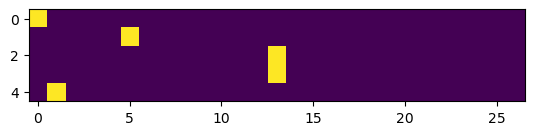

In [344]:
plt.imshow(xenc)

it simply means turn on the bit where the index of the input exist.

In [349]:
xenc.dtype # do not feed intergers to the neural network.

torch.float32

#### Weight Initialization for the NN

##### For 1 neuron (27, 1)

In [354]:
W = torch.randn((27, 1))
W

tensor([[ 1.0739],
        [-0.8449],
        [ 0.6316],
        [-0.1800],
        [ 0.6078],
        [ 1.1566],
        [-1.6915],
        [ 2.3343],
        [ 0.3681],
        [ 0.3773],
        [-1.1048],
        [-0.6755],
        [-0.1177],
        [-0.5137],
        [ 0.2026],
        [ 0.0162],
        [ 1.1854],
        [-2.1010],
        [ 1.8000],
        [ 0.5064],
        [ 1.3524],
        [ 1.9117],
        [ 2.0874],
        [-0.1640],
        [-0.1681],
        [ 0.4313],
        [-2.7329]])

In [356]:
xenc @ W

tensor([[ 1.0739],
        [ 1.1566],
        [-0.5137],
        [-0.5137],
        [-0.8449]])

In [358]:
(xenc @ W).shape

torch.Size([5, 1])

In [374]:
# (5, 27) @ (27, 1) = (5, 1)

In [362]:
xenc[0]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [368]:
W[:, 0]

tensor([ 1.0739, -0.8449,  0.6316, -0.1800,  0.6078,  1.1566, -1.6915,  2.3343,
         0.3681,  0.3773, -1.1048, -0.6755, -0.1177, -0.5137,  0.2026,  0.0162,
         1.1854, -2.1010,  1.8000,  0.5064,  1.3524,  1.9117,  2.0874, -0.1640,
        -0.1681,  0.4313, -2.7329])

In [372]:
torch.sum(xenc[0] * W[:, 0])

tensor(1.0739)

##### For 27 neurons

In [378]:
W = torch.randn((27, 27))
W # weights for 27 neurons

tensor([[-4.3167e-01, -4.7660e-01,  1.2516e+00, -1.0452e+00,  2.0540e+00,
          1.5153e+00, -4.7535e-01,  1.3654e+00, -4.1069e-01, -1.5033e+00,
          1.9407e-01, -1.3039e+00, -2.5526e+00,  1.1357e+00,  8.7036e-01,
         -1.0899e+00,  1.1562e+00,  9.1713e-01,  2.0027e+00, -5.3163e-02,
         -6.0621e-01,  2.7692e-01,  2.0942e+00, -5.4687e-02, -3.7407e-01,
          6.9643e-01,  4.6554e-01],
        [-2.1983e-01, -4.9069e-01,  1.6637e-01, -9.8829e-02,  6.2147e-01,
          1.3691e+00, -3.6199e-01,  8.9517e-01,  1.2996e+00, -1.8599e-01,
          4.5495e-01,  4.2383e-01, -1.8845e-02,  2.2704e-01,  3.2587e-01,
         -5.0582e-01, -1.9166e-01, -5.7310e-01, -1.2839e+00, -8.5781e-01,
          1.1981e+00,  3.0676e-01, -9.6638e-01, -2.7473e-01,  5.5846e-01,
          1.7493e+00,  2.2085e+00],
        [-5.0300e-01,  8.9724e-01,  3.8307e-01, -1.5311e-01, -3.8533e-01,
         -2.4516e-01, -1.4385e+00, -2.7775e-01,  8.3094e-01, -2.0945e+00,
          1.0913e+00,  1.4922e+00,  2.09

In [380]:
# (5, 27) @ (27, 27) = (5, 27) # 5 rows bhejo har 1 ke liye 27 output honge because of 27 neuron.

why we are building 27 neurons so that the output will be the distribution of probabilities for each character so that we can pick which is the highest.

In [383]:
(xenc @ W)

tensor([[-0.4317, -0.4766,  1.2516, -1.0452,  2.0540,  1.5153, -0.4754,  1.3654,
         -0.4107, -1.5033,  0.1941, -1.3039, -2.5526,  1.1357,  0.8704, -1.0899,
          1.1562,  0.9171,  2.0027, -0.0532, -0.6062,  0.2769,  2.0942, -0.0547,
         -0.3741,  0.6964,  0.4655],
        [ 0.7961, -2.0729,  1.0279, -0.4229,  0.1018, -0.7317, -0.2176, -2.2149,
          0.1800, -0.3610, -1.5347,  1.2468, -1.4087, -0.5152, -1.3909, -0.5963,
         -0.3519, -1.3027, -0.3571, -0.8300, -1.2211, -0.5716, -0.1001, -0.3161,
         -1.1559,  0.1870,  1.5450],
        [-0.5803,  1.2630, -0.8686,  1.2723,  0.9595,  0.7400, -0.5966,  0.3578,
         -0.4629, -0.3169, -0.2165, -0.8808, -0.7293,  0.7266, -0.9432, -0.8287,
         -0.9974, -1.6566,  0.1953,  0.1257, -0.6887,  0.8956,  2.3202,  0.9034,
         -0.9857, -0.4478, -0.6079],
        [-0.5803,  1.2630, -0.8686,  1.2723,  0.9595,  0.7400, -0.5966,  0.3578,
         -0.4629, -0.3169, -0.2165, -0.8808, -0.7293,  0.7266, -0.9432, -0.8287

these are some positive or negative numbers but we want probability distribution so what can we do to convert this into probability? 
use `exponentiation` what it does is if the number is negative the output is below 1 if the number is positive the output be go up to infinity

In [388]:
((xenc @ W).exp())

tensor([[ 0.6494,  0.6209,  3.4960,  0.3516,  7.7988,  4.5508,  0.6217,  3.9175,
          0.6632,  0.2224,  1.2142,  0.2715,  0.0779,  3.1134,  2.3878,  0.3362,
          3.1779,  2.5021,  7.4094,  0.9482,  0.5454,  1.3191,  8.1191,  0.9468,
          0.6879,  2.0066,  1.5929],
        [ 2.2169,  0.1258,  2.7951,  0.6551,  1.1072,  0.4811,  0.8045,  0.1092,
          1.1972,  0.6970,  0.2155,  3.4793,  0.2445,  0.5974,  0.2489,  0.5508,
          0.7033,  0.2718,  0.6997,  0.4360,  0.2949,  0.5646,  0.9047,  0.7290,
          0.3148,  1.2056,  4.6879],
        [ 0.5597,  3.5360,  0.4196,  3.5692,  2.6104,  2.0960,  0.5507,  1.4302,
          0.6294,  0.7284,  0.8053,  0.4144,  0.4823,  2.0681,  0.3894,  0.4366,
          0.3688,  0.1908,  1.2157,  1.1339,  0.5022,  2.4488, 10.1782,  2.4679,
          0.3732,  0.6390,  0.5445],
        [ 0.5597,  3.5360,  0.4196,  3.5692,  2.6104,  2.0960,  0.5507,  1.4302,
          0.6294,  0.7284,  0.8053,  0.4144,  0.4823,  2.0681,  0.3894,  0.4366

In [391]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent to N matrix.
probs = counts / counts.sum(1, keepdims=True) # normalize to get the probabilities
probs


tensor([[0.0109, 0.0104, 0.0587, 0.0059, 0.1310, 0.0764, 0.0104, 0.0658, 0.0111,
         0.0037, 0.0204, 0.0046, 0.0013, 0.0523, 0.0401, 0.0056, 0.0534, 0.0420,
         0.1244, 0.0159, 0.0092, 0.0222, 0.1363, 0.0159, 0.0116, 0.0337, 0.0267],
        [0.0842, 0.0048, 0.1061, 0.0249, 0.0420, 0.0183, 0.0305, 0.0041, 0.0455,
         0.0265, 0.0082, 0.1321, 0.0093, 0.0227, 0.0094, 0.0209, 0.0267, 0.0103,
         0.0266, 0.0166, 0.0112, 0.0214, 0.0344, 0.0277, 0.0120, 0.0458, 0.1780],
        [0.0137, 0.0867, 0.0103, 0.0875, 0.0640, 0.0514, 0.0135, 0.0351, 0.0154,
         0.0179, 0.0197, 0.0102, 0.0118, 0.0507, 0.0095, 0.0107, 0.0090, 0.0047,
         0.0298, 0.0278, 0.0123, 0.0600, 0.2495, 0.0605, 0.0091, 0.0157, 0.0133],
        [0.0137, 0.0867, 0.0103, 0.0875, 0.0640, 0.0514, 0.0135, 0.0351, 0.0154,
         0.0179, 0.0197, 0.0102, 0.0118, 0.0507, 0.0095, 0.0107, 0.0090, 0.0047,
         0.0298, 0.0278, 0.0123, 0.0600, 0.2495, 0.0605, 0.0091, 0.0157, 0.0133],
        [0.0165, 0.0126,

In [393]:
probs.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [395]:
# SUMMARY ------------------------------------>>>

In [397]:
xs

tensor([ 0,  5, 13, 13,  1])

In [399]:
ys

tensor([ 5, 13, 13,  1,  0])

In [401]:
# randomly initialize 27 neurons' weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [403]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [405]:
probs.shape

torch.Size([5, 27])

#### Loss Calculation

In [409]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index 
    print('-------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output prob from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned to the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll
print('=============')
print('average negative log likelihood, i.e. loss = ', nlls.mean().item())
    

-------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output prob from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned to the net to the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
-------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output prob from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned to the net to the correct character: 0.018050700426101685
log likel

In [412]:
# ________________!!! OPTIMIZATION !!! ________________

In [414]:
xs

tensor([ 0,  5, 13, 13,  1])

In [416]:
ys

tensor([ 5, 13, 13,  1,  0])

In [452]:
# randomly initialize 27 neurons' weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [454]:
# Forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [456]:
# backward pass
W.grad = None #set to zero the gradient
loss.backward()


In [458]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [460]:
W.shape

torch.Size([27, 27])

In [462]:
W.grad.shape

torch.Size([27, 27])

In [464]:
W.data += -0.1 * W.grad

In [469]:
# Forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), ys].log().mean()
loss 

tensor(3.7492, grad_fn=<NegBackward0>)

**WOOHOO loss decrease a little - let's try few more times. rerun below 2 cells again and again to see the effect.**


In [721]:
# backward pass
W.grad = None #set to zero the gradient
loss.backward()
W.data += -0.1 * W.grad

In [723]:
# Forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(2.6193, grad_fn=<NegBackward0>)

In [725]:
# __________ !!! Optimization !!! yay, but this time actually _________________

In [727]:
xs, ys = [], [] # inputs , targets 
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ',num)
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  275691


In [828]:
# Gradient Descent
for k in range(200):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    # update 
    W.data += -50 * W.grad

2.491358757019043
2.49131441116333
2.491270065307617
2.4912264347076416
2.491183042526245
2.491140127182007
2.491098165512085
2.491056203842163
2.4910147190093994
2.490973711013794
2.490933418273926
2.4908933639526367
2.4908535480499268
2.490814447402954
2.4907753467559814
2.4907374382019043
2.490699052810669
2.490661382675171
2.490624189376831
2.4905874729156494
2.490550994873047
2.4905147552490234
2.490478992462158
2.490443468093872
2.4904086589813232
2.4903740882873535
2.490339756011963
2.4903054237365723
2.490272045135498
2.490238666534424
2.490205764770508
2.490172863006592
2.490140676498413
2.4901084899902344
2.490076780319214
2.4900450706481934
2.490013837814331
2.489982843399048
2.489952564239502
2.489921808242798
2.48989200592041
2.4898622035980225
2.489832878112793
2.4898035526275635
2.489774465560913
2.489745855331421
2.489717721939087
2.4896891117095947
2.489661455154419
2.489633321762085
2.4896061420440674
2.48957896232605
2.4895520210266113
2.4895248413085938
2.4894983768

### Prediction

In [806]:
# Finally, sample from the neural net model
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix  ])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cfay.
a.


In [820]:
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix

9

In [822]:
p.shape

torch.Size([1, 27])